<a href="https://colab.research.google.com/github/hellosmallkat/01-k-means/blob/main/Copy_of_01_k_means_finshed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate data
Use the `make_blobs` function to generate some random data, following Gaussian blobs

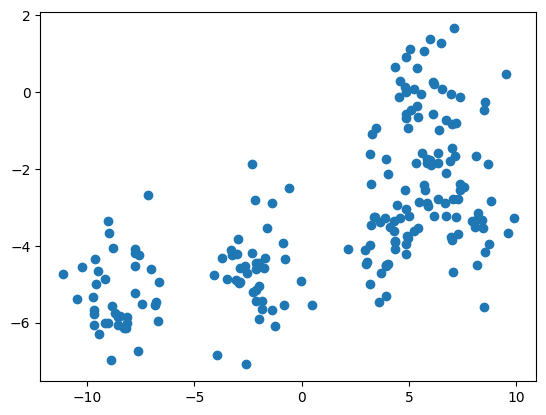

In [3]:
X, _ = make_blobs(n_samples=200, centers=5)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Apply K-Means (scikit-learn)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html


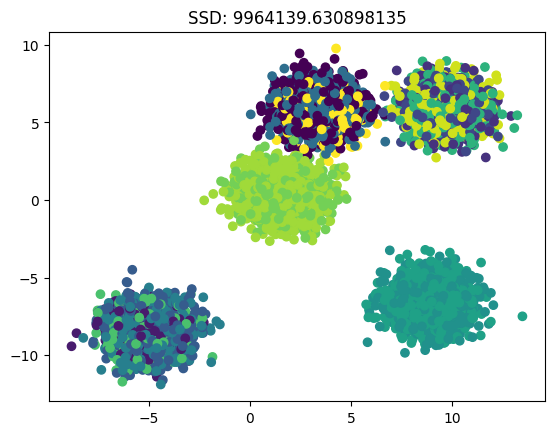

In [13]:
algo = KMeans(n_clusters=15, init='random', n_init=10)
pred = algo.fit_predict(X)
plt.title(f'SSD: {algo.inertia_}')
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

# Implementing K-Means from scratch (minimal version)

In [5]:
def kmeans(x, K):
    # random initialization
    idxs = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[idxs].copy()
    prev = np.zeros(x.shape[0])
    while True:
        # assignment
        distances = ((x - centroids[:,np.newaxis]) ** 2).sum(axis=2)
        C = np.argmin(distances, axis=0)
        # centroid recalculation
        centroids = np.array([x[C==k].mean(axis=0) for k in range(K)])
        # stop condition
        if np.equal(prev, C).all():
            break
        prev = C
    return C


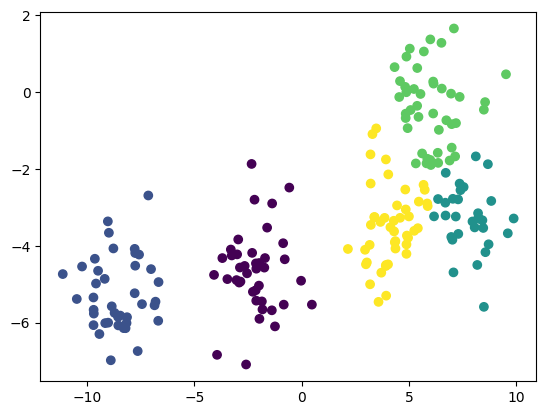

In [6]:
pred = kmeans(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=pred)

# Understanding the `assignment` calculation in the code

In [7]:
A = np.arange(10).reshape(5,2)
print(A)
B = np.arange(6).reshape(3,2)
print(B)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 1]
 [2 3]
 [4 5]]


In [8]:
C = A-B[:, np.newaxis]
print(C)

[[[ 0  0]
  [ 2  2]
  [ 4  4]
  [ 6  6]
  [ 8  8]]

 [[-2 -2]
  [ 0  0]
  [ 2  2]
  [ 4  4]
  [ 6  6]]

 [[-4 -4]
  [-2 -2]
  [ 0  0]
  [ 2  2]
  [ 4  4]]]


In [9]:
D = C ** 2
print(D)

[[[ 0  0]
  [ 4  4]
  [16 16]
  [36 36]
  [64 64]]

 [[ 4  4]
  [ 0  0]
  [ 4  4]
  [16 16]
  [36 36]]

 [[16 16]
  [ 4  4]
  [ 0  0]
  [ 4  4]
  [16 16]]]


In [10]:
E = D.sum(axis=2)
print(E) # distances

[[  0   8  32  72 128]
 [  8   0   8  32  72]
 [ 32   8   0   8  32]]


In [11]:
np.argmin(E, axis=0) # shortest distances

array([0, 1, 2, 2, 2])

# The Elbow method

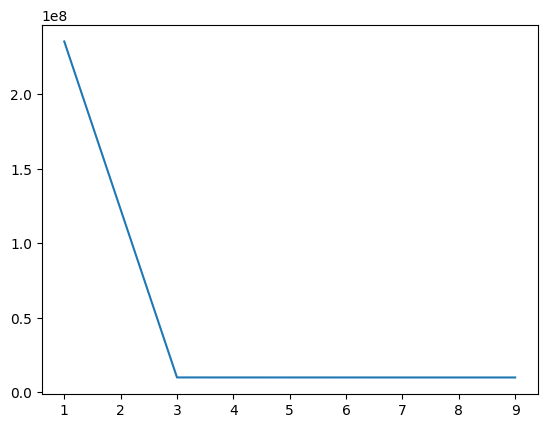

In [16]:
# generate data
X, _ = make_blobs(n_samples=10000, centers=3, n_features=1000)

# apply clustering with multiple K
K_values = np.array(range(1, 11, 2))
inertia = np.empty_like(K_values)
for i, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, n_init=1)
    kmeans.fit(X)
    inertia[i] = kmeans.inertia_

# plot results
plt.plot(K_values, inertia)
plt.show()

What is inertia? How do I use it to decide the number of K of clusters? What is the "eldow method"?

Inertia is the measure of the compactness of the clusters. Which is found by taking the sum of squared distances of each data point to its assigned cluster's centroid. We use to decide the number of K of clusters since when K increases interia decreases since it cuases more data to fit in. The eldow method is a technique for finding the optimal number of clusters (k) in k-means clustering